In [2]:
import pandas as pd
import numpy as np
import os, sys

sys.path.insert(0, "../")

from utils_local import plot_utils



In [3]:
betas      = np.linspace(0.001, 1, 1000)
norm_alpha = np.linspace(0.1, 2, 1000)
rho_norm   = np.full((len(betas), len(norm_alpha)), np.nan)


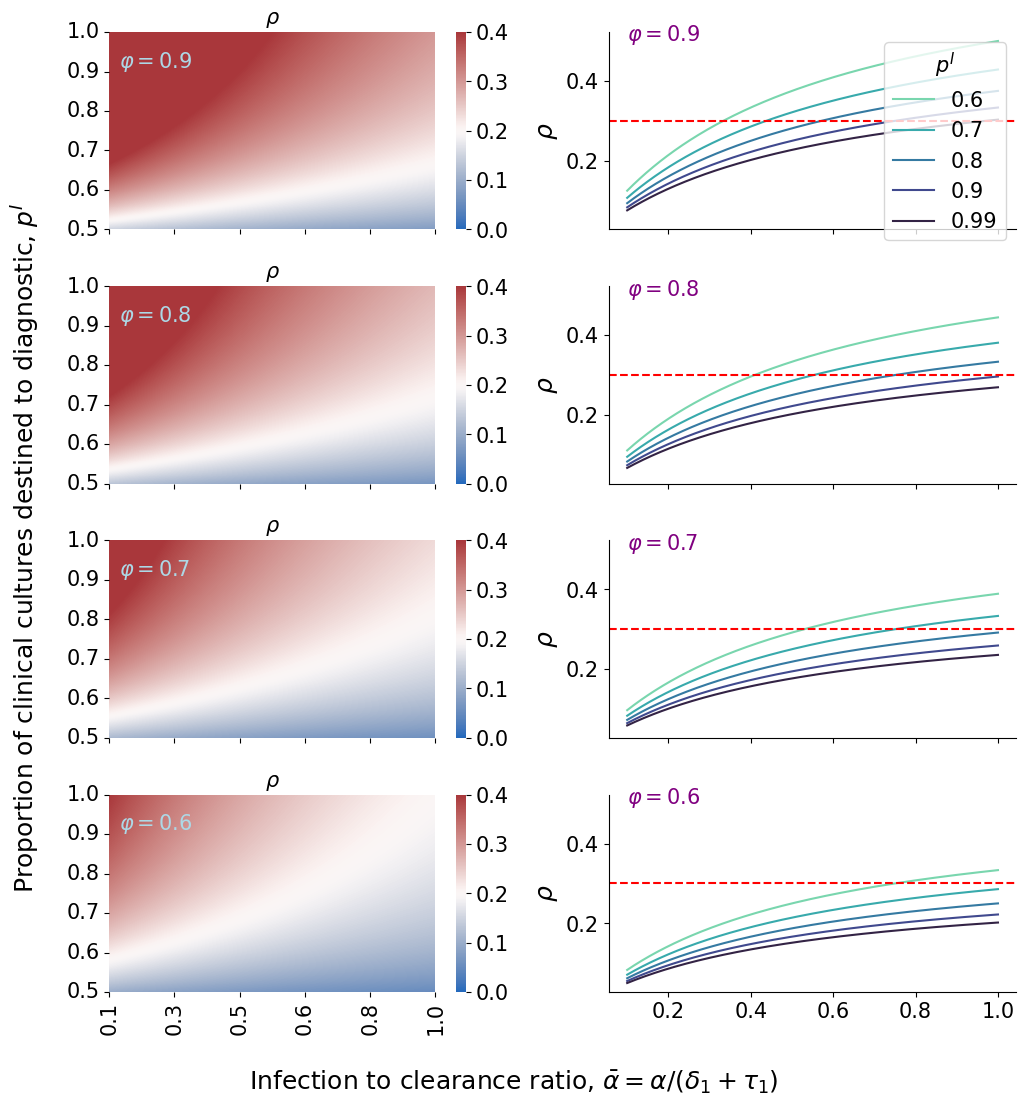

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(4, 2, figsize=(10.5, 11.2), sharey="col", sharex="col")

for idx_phi, φ in enumerate([0.9, 0.8, 0.7, 0.6]):

    p          = np.linspace(0.5, 1, 1000)
    alpha_norm = np.linspace(0.1,   1, 1000)

    prob_cult, alphass = np.meshgrid(p, alpha_norm)
    ro_bar      = φ * ((1/prob_cult)  * (alphass) / (2 * alphass+1))
    rho_norm_df = pd.DataFrame(ro_bar, index=p, columns=alpha_norm)

    ax_hm          = ax[idx_phi, 0]
    palette = sns.color_palette("vlag", as_cmap=True)
    sns.heatmap(ax = ax_hm, data=rho_norm_df.iloc[::-1], cmap=palette,  cbar=True, vmin=0.0, vmax=0.4)

    #ax_hm.set_xlabel(r'$\bar{\alpha}= \alpha/ ( \delta + \tau_1)$', fontsize=15)

    xticks        = rho_norm_df.columns
    keptxticksidx = np.linspace(0,len(xticks),6)
    xtickslabels  = list(xticks[ np.maximum(keptxticksidx.astype(int)-1,0) ])
    xtickslabels  = ['{:.1f}'.format(l) for l in xtickslabels]

    yticks         = rho_norm_df.iloc[::-1].index
    keptyticksidx  = np.linspace(0,len(yticks),6)
    ytickslabels   = list(yticks[ np.maximum(keptyticksidx.astype(int)-1,0) ])
    ytickslabels   = ['{:.1f}'.format(l) for l in ytickslabels]

    ax_hm.set_xticks(keptxticksidx)
    ax_hm.set_yticks(keptyticksidx)

    ax_hm.set_xticklabels(xtickslabels, fontsize=20, rotation=0)
    ax_hm.set_yticklabels(ytickslabels, fontsize=20)

    ax_hm.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
    ax_hm.tick_params( which='both', axis='both', labelsize=15)

    ax_hm.set_title(r"$\rho$", fontsize=15)

    Ps = [0.6, 0.7, 0.8,  0.9,  0.99]
    colors = sns.color_palette(palette="mako_r", n_colors=len(Ps), desat=None, as_cmap=False)
    for idx_p, p in enumerate(Ps):
        ro = φ * (1/p)  * (alpha_norm) / (2 * alpha_norm+1)
        ax[idx_phi, 1].plot(alpha_norm, ro, label=p, color=colors[idx_p])

    ax[idx_phi, 1].axhline(y=0.3, color='red', linestyle='--')
    ax[idx_phi, 1].set_ylabel(r"$\rho$")

    ax[idx_phi, 1].text(s=r"$\varphi=${}".format(φ),
                        x=0.1, y=0.5, color="purple")

    ax[idx_phi, 0].text(s=r"$\varphi=${}".format(φ),
                        x=30, y=180, color="lightblue")

ax[0, 1].legend(title=r'$p^I$', ncol=1, loc="upper right")

for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel(r"Infection to clearance ratio, $\bar{\alpha}= \alpha/ ( \delta_1 + \tau_1)$")
fig.supylabel(r'Proportion of clinical cultures destined to diagnostic, $p^I$')

plt.tight_layout()
fig.savefig('./EffectiveSensitivity.png', bbox_inches='tight', dpi=300)
